# Data in 3D - Selecting and Functions

We'll continue working with 3 dimensional datasets and continue using `xarray` to apply _functions_ to our data selections.

We'll start by importing the packages we need and loading the [Berkeley Earth](https://berkeleyearth.org/data/) gridded, global surface temperature dataset.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# load data
fname_in = '../data/Land_and_Ocean_LatLong1.nc'
DS = xr.open_dataset(fname_in,engine='netcdf4')

In [3]:
# view the dataset
DS

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2091, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               09-Apr-2024 08:10:00
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   05-Apr-2024 15:18:58
    ocean_source_history:  08-Apr-2024 16:15:50
    comment:               This file contains Berkeley Earth surface temperat...

## Selecting a range with `slice`
Let's remind ourselves that climate is a longterm (>30 years) average of conditions on Earth. In the last notebook, we used the `sel` function to look at individual points in time and space. We can also use `sel` to select a range of points to make meaningful subsets of the data.

Let's start by selecting a 30-year chunk of the surface temperature data from 1990-2020. We can select a range by using the `slice` argument on the `time` dimension.

In [4]:
present = DS['temperature'].sel(time=slice(1990,2020))

In [5]:
present

<xarray.DataArray 'temperature' (time: 360, latitude: 180, longitude: 360)>
[23328000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) float64 1.99e+03 1.99e+03 1.99e+03 ... 2.02e+03 2.02e+03
Attributes:
    units:          degree C
    standard_name:  surface_temperature_anomaly
    long_name:      Air Surface Temperature Anomaly
    valid_min:      -20.12605651877775
    valid_max:      25.74818089592951

Now we have a new variable, `present` which is the temperature reccord from 1990-2020. It's nice having this data in it's own `DataArray`, but the value of this selection comes from being able to run calculations on the subset.

## Applying built-in functions

Now that we have our subset we can ask questions about the subset of data and use built-in functions to run calculations on that subset. Let's start with a familiar ones, like `mean`, `min`, `max`, `std`.

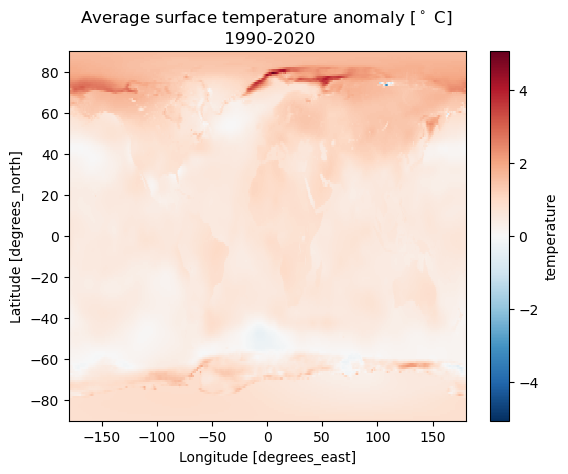

In [6]:
present.mean('time').plot()
plt.title(f'Average surface temperature anomaly [$^\circ$ C] \n 1990-2020')
plt.show()

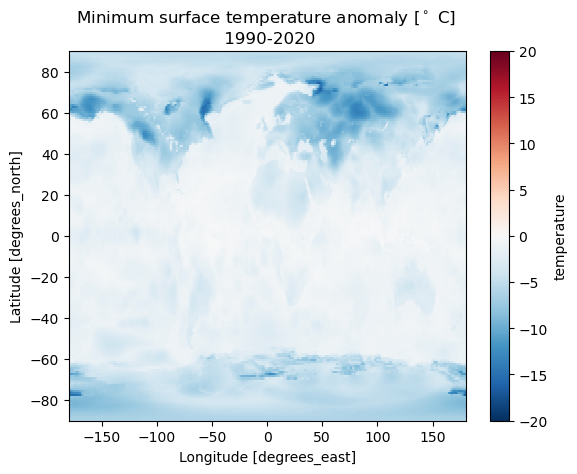

In [7]:
present.min('time').plot(vmin=-20,vmax=20,cmap='RdBu_r')
plt.title(f'Minimum surface temperature anomaly [$^\circ$ C] \n 1990-2020')
plt.show()

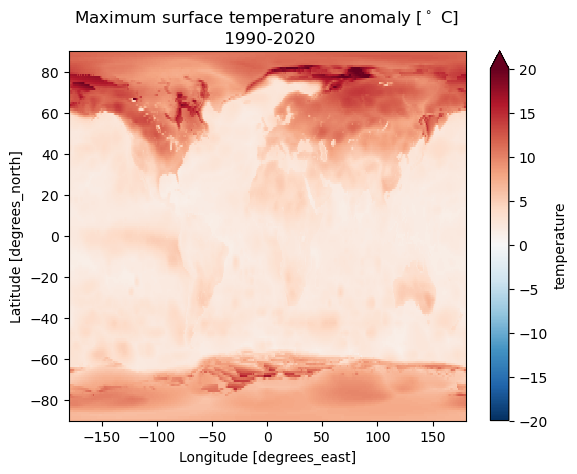

In [8]:
present.max('time').plot(vmin=-20,vmax=20,cmap='RdBu_r')
plt.title(f'Maximum surface temperature anomaly [$^\circ$ C] \n 1990-2020')
plt.show()

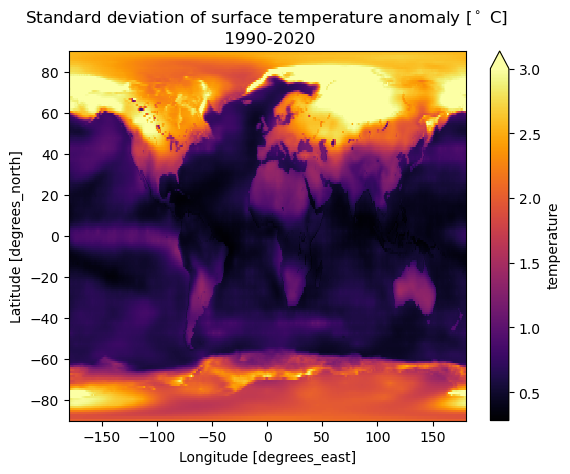

In [9]:
present.std('time').plot(vmax=3,cmap='inferno')
plt.title(f'Standard deviation of surface temperature anomaly [$^\circ$ C] \n 1990-2020')
plt.show()

## Quick linear regression

We can also use built-in functions to calculate trends in the temperature reccord within the subset using `polyfit`.

In [10]:
fit = present.polyfit('time',1,full=True)

In [11]:
fit

<xarray.Dataset>
Dimensions:               (degree: 2, latitude: 180, longitude: 360)
Coordinates:
  * degree                (degree) int64 1 0
  * latitude              (latitude) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
  * longitude             (longitude) float32 -179.5 -178.5 ... 178.5 179.5
Data variables:
    time_matrix_rank      int64 2
    time_singular_values  (degree) float64 1.414 0.003054
    polyfit_coefficients  (degree, latitude, longitude) float64 0.04257 ... -...
    polyfit_residuals     (latitude, longitude) float64 1.408e+03 ... 2.041e+03

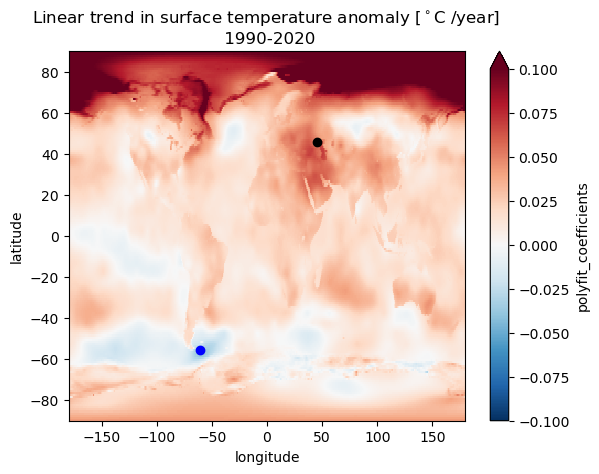

In [12]:
fit.polyfit_coefficients.sel(degree=1).plot(vmin=-0.1,vmax=0.1,cmap='RdBu_r')
plt.scatter(45.5,45.5,c='k')
plt.scatter(-60.5,-55.5,c='b')
plt.title(f'Linear trend in surface temperature anomaly [$^\circ$C /year] \n 1990-2020')
plt.show()

Let's test the fit data to see what that looks like at a point.

In [13]:
trend = fit.polyfit_coefficients.sel(degree=1)*present.time + fit.polyfit_coefficients.sel(degree=0)

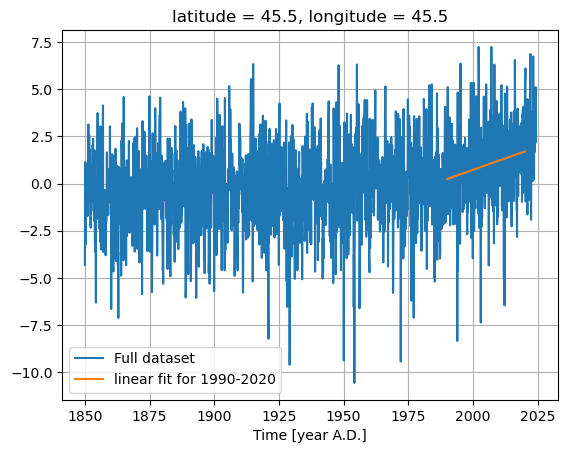

In [14]:
DS['temperature'].sel(latitude=45.5,longitude=45.5).plot(label='Full dataset')
trend.sel(latitude=45.5,longitude=45.5).plot(label='linear fit for 1990-2020')
plt.grid()
plt.legend()
plt.show()

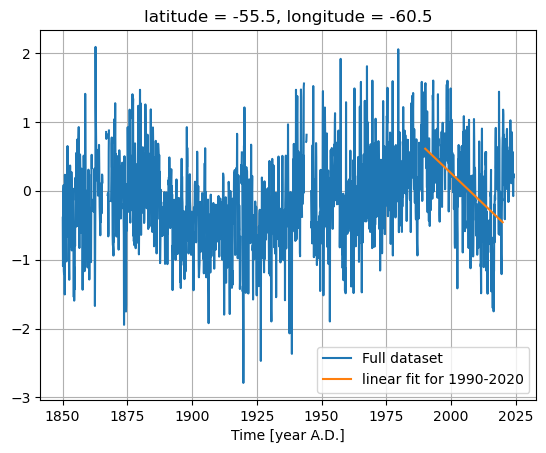

In [15]:
DS['temperature'].sel(latitude=-55.5,longitude=-60.5).plot(label='Full dataset')
trend.sel(latitude=-55.5,longitude=-60.5).plot(label='linear fit for 1990-2020')
plt.grid()
plt.legend()
plt.show()

In [16]:
past = DS['temperature'].sel(time=slice(1900,1930))

In [17]:
fit2 = past.polyfit('time',1,full=True)

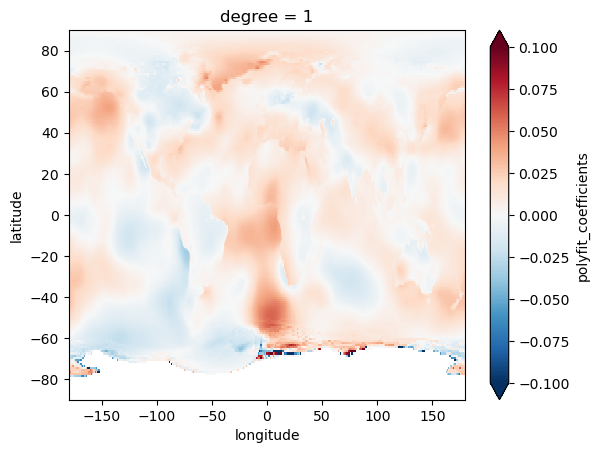

In [18]:
fit2.polyfit_coefficients.sel(degree=1).plot(vmin=-0.1,vmax=0.1,cmap='RdBu_r')
plt.show()

In [19]:
trend2 = fit2.polyfit_coefficients.sel(degree=1)*past.time + fit2.polyfit_coefficients.sel(degree=0)

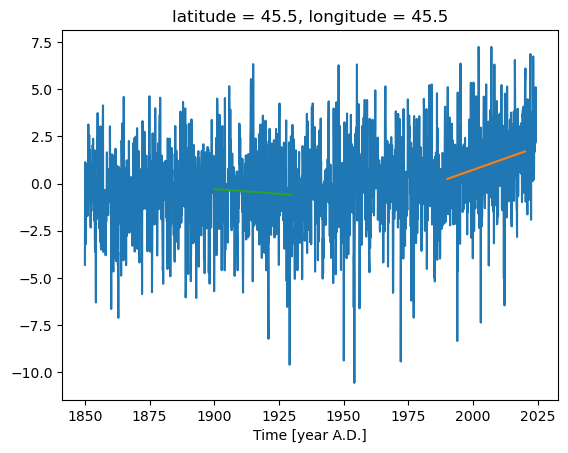

In [20]:
DS['temperature'].sel(latitude=45.5,longitude=45.5).plot(label='Full dataset')
trend.sel(latitude=45.5,longitude=45.5).plot(label='linear fit for 1990-2020')
trend2.sel(latitude=45.5,longitude=45.5).plot(label='linear fit for 1900-1930')
plt.show()